# Mini Project 3 - Credit Card Fraud (Team 2)

# 1. Import packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("icefire")

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import ADASYN, SMOTE

from collections import Counter
from numpy import where

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.cluster import KMeans 
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [2]:
pd.set_option('display.max_columns', 100)

# metric used for RandomForrestClassifier
RFC_METRIC = 'gini'

# number of estimators used for RandomForrestClassifier
NUM_ESTIMATORS = 100 

#number of parallel jobs used for RandomForrestClassifier
NO_JOBS = 4 

#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
#number of KFolds for cross-validation
NUMBER_KFOLDS = 5 

In [3]:
RANDOM_STATE = 2018

# lgb iterations
MAX_ROUNDS = 1000 

# lgb early stop
EARLY_STOP = 50  

# to be adjusted based on best validation rounds
OPT_ROUNDS = 1000 

# print out metric result
VERBOSE_EVAL = 50 

IS_LOCAL = False

# 2. Dataset Overview

In [4]:
DATAFILE = 'creditcard.csv'
df = pd.read_csv(DATAFILE)

In [5]:
# view the head of the Dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Check the relevant information of the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# to confirm 0 null values 
df.isnull().any().sum()

0

In [8]:
#Checking the shape of df
df.shape

(284807, 31)

In [9]:
# summarize the class distribution
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


In [10]:
# create a copy of the df. 1 for summary and 1 for tests. 

df1 = df.copy(deep=True)

# 3. Summary of Target Variables

## (i) Plotting graphs to show Summary of the Dataset

Provide summary of the target variables with % fraudulent and % not fraudulent

In [11]:
non_fraud = np.round(df1['Class'].value_counts(normalize=True)[0]*100,4)
fraud = np.round(df1['Class'].value_counts(normalize=True)[1]*100,5)
print("% of Non-Fraudulent:\t", non_fraud)
print("% of Fraudulent:\t", fraud)

% of Non-Fraudulent:	 99.8273
% of Fraudulent:	 0.17275


0    284315
1       492
Name: Class, dtype: int64


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

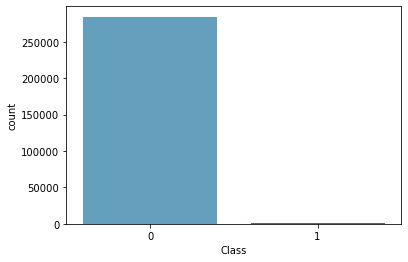

In [12]:
y_class = df1['Class'].value_counts()
print(y_class)
sns.countplot(df['Class'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

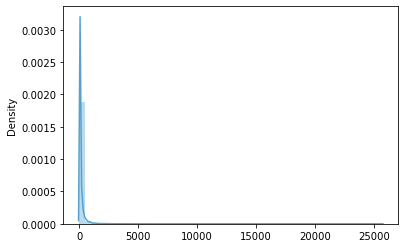

In [13]:
# distribution of Amount
amount = [df1['Amount'].values]
sns.distplot(amount)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

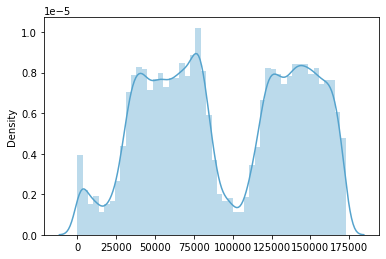

In [14]:
# distribution of Time
time = df1['Time'].values
sns.distplot(time)

In [15]:
Fraud = df1[df1['Class'] == 1]
print("Amount details of fradulent transacation")
Fraud.Amount.describe()

Amount details of fradulent transacation


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<AxesSubplot:xlabel='Time', ylabel='Amount'>

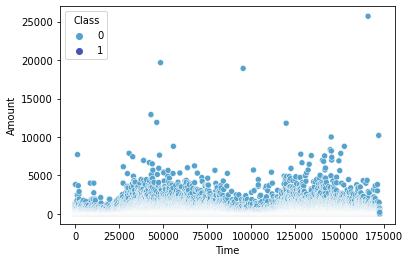

In [16]:
sns.scatterplot(data=df1, x="Time", y="Amount", hue="Class")

In [17]:
df1['Hour'] = df1['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df1.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df1 = pd.DataFrame(tmp)
df1.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df1.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


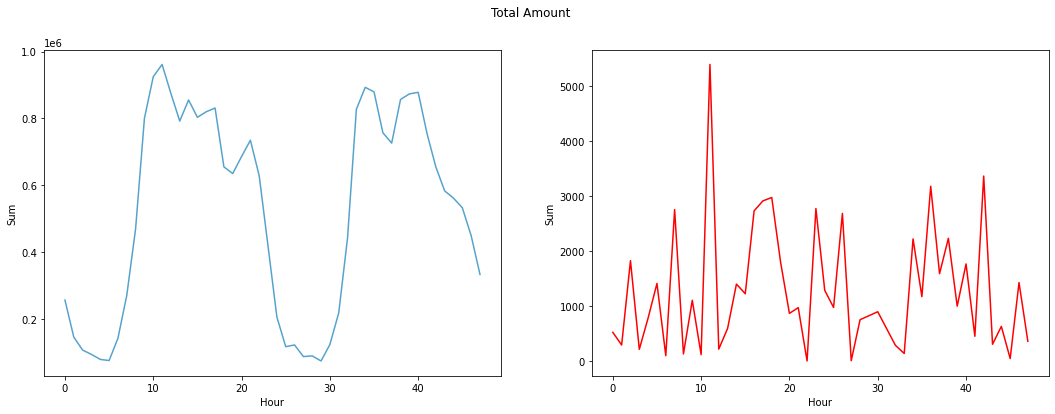

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df1.loc[df1.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df1.loc[df1.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

In [19]:
# Describe the dataset
df1.describe()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.00000,93.000000
mean,23.361702,0.489362,2.998085,3810.084362,3029.861702,267687.127766,105.322347,37.70266,65428.201318
std,14.041299,0.502567,16.212902,4609.849772,3604.751627,342170.475546,72.024138,57.56944,87044.817676
min,0.000000,0.000000,0.000000,7.570000,1.000000,8.770000,2.923333,0.68000,16.353633
25%,11.250000,0.000000,0.000000,539.620000,9.250000,1030.855000,68.348429,12.44000,19722.998459
50%,23.000000,0.000000,0.000000,1908.075000,1093.000000,75051.755000,86.973189,19.91000,45060.783960
75%,35.750000,1.000000,0.605000,5865.455000,7712.250000,616901.745000,113.409189,30.84500,77516.755638
max,47.000000,1.000000,144.620000,25691.160000,9881.000000,961494.920000,397.706250,319.36000,739515.311747


# RandomForestClassifier

In [20]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [21]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [22]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [23]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [24]:
preds = clf.predict(valid_df[predictors])

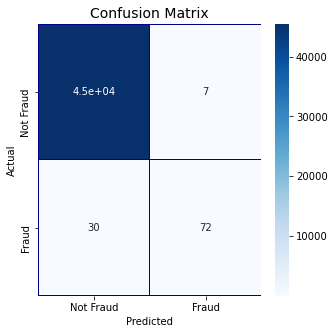

In [25]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [26]:
roc_auc_score(valid_df[target].values, preds)

0.8528641975628091

In [27]:
preds = clf.predict(test_df[predictors])

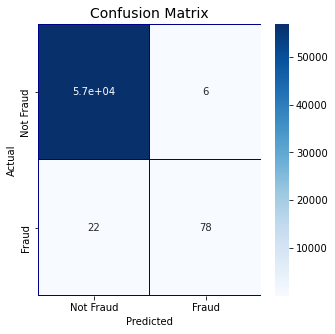

In [28]:
cm = pd.crosstab(test_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [29]:
roc_auc_score(test_df[target].values, preds)

0.8899472406879815

In [30]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [31]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [32]:
preds = clf.predict(valid_df[predictors])

In [33]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

# AdaBoostClassifier

In [34]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [35]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [36]:
preds = clf.predict(valid_df[predictors])

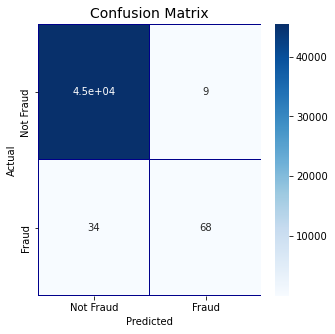

In [37]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [38]:
roc_auc_score(valid_df[target].values, preds)

0.8332343604519027

In [39]:
preds = clf.predict(test_df[predictors])

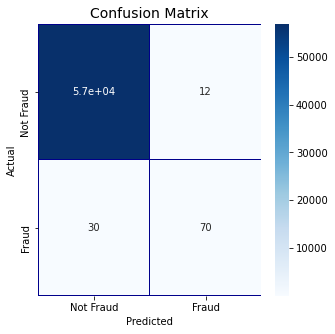

In [40]:
cm = pd.crosstab(test_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [41]:
roc_auc_score(test_df[target].values, preds)

0.8498944813759629

# XGBoost

In [42]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [43]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[22:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.89296	valid-auc:0.85272
[50]	train-auc:0.93947	valid-auc:0.88200
[100]	train-auc:0.94415	valid-auc:0.89094
[150]	train-auc:0.97837	valid-auc:0.96362
[200]	train-auc:0.99002	valid-auc:0.98397
[250]	train-auc:0.99361	valid-auc:0.98592
[300]	train-auc:0.99457	valid-auc:0.98667
[331]	train-auc:0.99541	valid-auc:0.98555


In [44]:
preds = model.predict(dtest)

In [45]:
roc_auc_score(test_df[target].values, preds)

0.9766700080897612

Training and validation using cross-validation


In [46]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

In [47]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)


In [48]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=2*EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025212 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.997909	valid's auc: 0.952288
[100]	train's auc: 0.999032	valid's auc: 0.945553
Early stopping, best iteration is:
[29]	train's auc: 0.996594	valid's auc: 0.957864


In [49]:
preds = model.predict(test_df[predictors])

In [50]:
roc_auc_score(test_df[target].values, preds)

0.9473337202349548

In [51]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]
    
    evals_results = {}
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= VERBOSE_EVAL, early_stopping_rounds= EARLY_STOP)
    
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.970275	valid_1's auc: 0.990668
Early stopping, best iteration is:
[6]	training's auc: 0.967014	valid_1's auc: 0.994598
Fold  1 AUC : 0.994598
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.97612	valid_1's auc: 0.962458
Early stopping, best iteration is:
[26]	training's auc: 0.977679	valid_1's auc: 0.969603
Fold  2 AUC : 0.969603
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.980458	valid_1's auc: 0.948161
Early stopping, best iteration is:
[42]	training's auc: 0.981423	valid_1's auc: 0.948699
Fo

In [52]:
#Select target and predicator variables

X = df.drop('Class', axis=1)
y = df['Class']

In [53]:
def plot_data(X, y):
 plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
 plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
 plt.legend()
 return plt.show()

In [54]:
def prep_data(df):
        X = df.iloc[:, 1:29].values
        X = np.array(X).astype(np.float)
        y = df.iloc[:, 30].values
        y=np.array(y).astype(np.float)
        return X,y

In [55]:
X, y = prep_data(df)

<ipython-input-54-953343723cf4>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(X).astype(np.float)
<ipython-input-54-953343723cf4>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=np.array(y).astype(np.float)


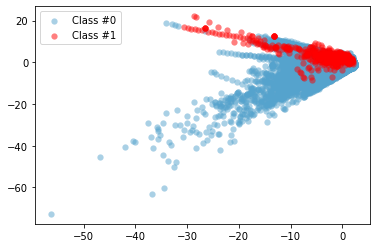

In [56]:
plot_data(X, y)

# 4. Machine Learning (Attempt #1)

In [57]:
def read_data(data_file):
    return pd.read_csv(DATAFILE)
    
def credit_card_data_x_y():
    df = read_data(DATAFILE)
    X = df.drop('Class', axis=1)
    y = df['Class']
    return X,y

def predict_data(data_x_y, classification_model):
    X, y = data_x_y()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    classification_model.fit(X_train, y_train)
    return classification_model.predict(X_test)

def decision_tree_model():
    return tree.DecisionTreeClassifier()

def logistic_regression_binary_clf():
    return LogisticRegression(penalty="l2", C=1.0, solver="liblinear")

def knn_clf():
    return KNeighborsClassifier(n_neighbors = 5)


def balanced_random_forest_clf():
    return BalancedRandomForestClassifier(n_estimators=100, random_state=0)

def GB_clf():
    return GradientBoostingClassifier(max_depth=None, max_features=4, random_state=0)
 
def ET_clf():
    return ExtraTreesClassifier(n_estimators=100, random_state=0)    

def model_metrics(data_actual, data_pred):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 6))
    fig.subplots_adjust(wspace=1)
    df_clf_report = pd.DataFrame(classification_report(data_actual, data_pred, output_dict=True)).T
    print(df_clf_report)
    c_m = confusion_matrix(data_actual, data_pred)
    sns.heatmap(c_m, annot=True, fmt=".0f", ax=ax1, square=True, cbar_kws={'orientation': 'horizontal'}) #, vmin=0, vmax=max(map(lambda x: x[2], c_m))
    sns.heatmap(df_clf_report.iloc[: , :-1], annot=True, ax=ax2, square=True, cbar_kws={'orientation': 'horizontal'}) # , vmin=0, vmax=1
    plt.yticks(rotation=0)
    
def classification_app(data_x_y, classification_model):
    X, y = data_x_y()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = classification_model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_metrics(y_test, y_pred)
    
def classification_app_inbld(data_x_y, classification_model, imblearn_method, is_test_oversampled):
    
    X, y = data_x_y()
    
    if is_test_oversampled == False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        X_train, y_train = imblearn_method().fit_resample(X_train, y_train)
    else:
        X_imb, y_imb = imblearn_method().fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.2, random_state=0)
 
    model = classification_model()
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    
    model_metrics(y_test, y_pred)
    

## (i) Classifier Models without Imbalanced Learn Methods

### (a) Decision Tree Classifier 

              precision    recall  f1-score       support
0              0.999613  0.999578  0.999595  56861.000000
1              0.766990  0.782178  0.774510    101.000000
accuracy       0.999192  0.999192  0.999192      0.999192
macro avg      0.883302  0.890878  0.887053  56962.000000
weighted avg   0.999201  0.999192  0.999196  56962.000000


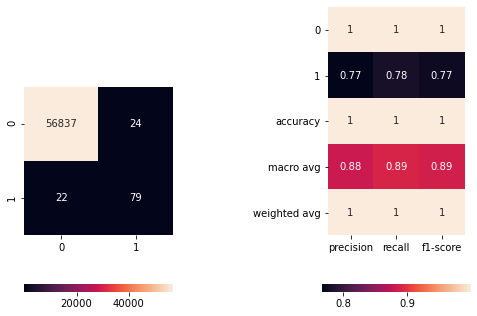

In [58]:
classification_app(credit_card_data_x_y, decision_tree_model)

### (b) Logistic Regression Binary Classifier

              precision    recall  f1-score       support
0              0.999227  0.999648  0.999437  56861.000000
1              0.740260  0.564356  0.640449    101.000000
accuracy       0.998876  0.998876  0.998876      0.998876
macro avg      0.869743  0.782002  0.819943  56962.000000
weighted avg   0.998767  0.998876  0.998801  56962.000000


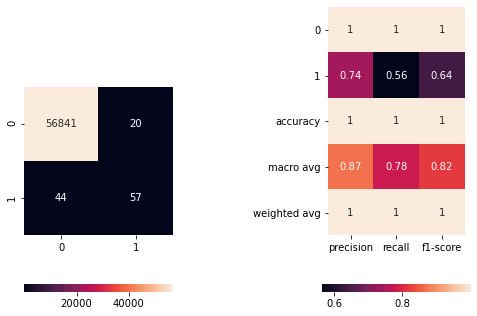

In [59]:
classification_app(credit_card_data_x_y, logistic_regression_binary_clf)

### (c) K-Nearest-Neighbours Classifier

              precision    recall  f1-score       support
0              0.998315  1.000000  0.999157  56861.000000
1              1.000000  0.049505  0.094340    101.000000
accuracy       0.998315  0.998315  0.998315      0.998315
macro avg      0.999157  0.524752  0.546748  56962.000000
weighted avg   0.998318  0.998315  0.997552  56962.000000


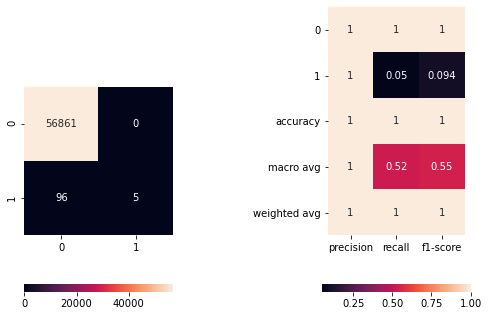

In [60]:
classification_app(credit_card_data_x_y, knn_clf)

### (d) Gradient Booster Classifier

              precision    recall  f1-score       support
0              0.999508  0.999613  0.999560  56861.000000
1              0.768421  0.722772  0.744898    101.000000
accuracy       0.999122  0.999122  0.999122      0.999122
macro avg      0.883964  0.861193  0.872229  56962.000000
weighted avg   0.999098  0.999122  0.999109  56962.000000


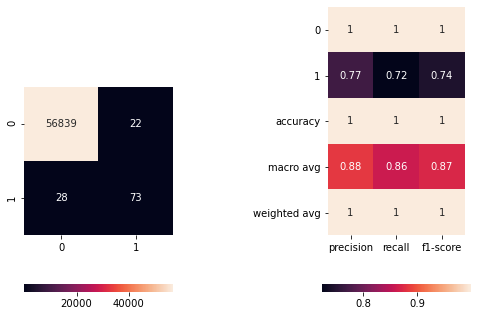

In [61]:
classification_app(credit_card_data_x_y, GB_clf)

### (e) ExtraTree Classifier

              precision    recall  f1-score       support
0              0.999596  0.999930  0.999763  56861.000000
1              0.951220  0.772277  0.852459    101.000000
accuracy       0.999526  0.999526  0.999526      0.999526
macro avg      0.975408  0.886103  0.926111  56962.000000
weighted avg   0.999510  0.999526  0.999501  56962.000000


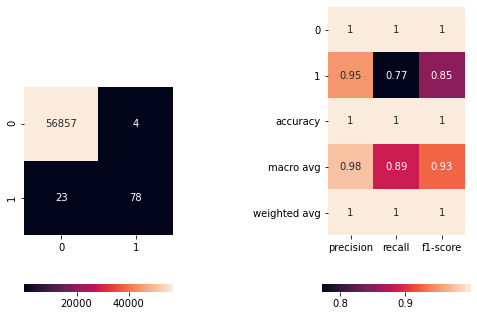

In [62]:
classification_app(credit_card_data_x_y, ET_clf)

## (ii) Classifier Models with Balanced Learn Methods

### (a) SMOTE - Synthetic Minority Oversampling Technique

In [63]:
smote = SMOTE()

X, y = credit_card_data_x_y()
X_smote, y_smote = smote.fit_resample(X, y)

0    284315
1    284315
Name: Class, dtype: int64


<AxesSubplot:>

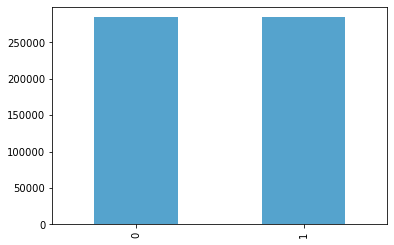

In [64]:
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_class = y_smote.iloc[:, 0].value_counts()
print(y_class)
y_class.plot(kind="bar")

In [65]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

In [66]:
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)

In [67]:
y_smote.iloc[:,0].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

In [69]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [70]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<AxesSubplot:>

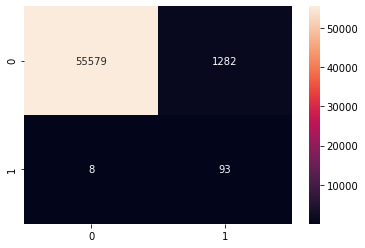

In [73]:
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [74]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

<AxesSubplot:>

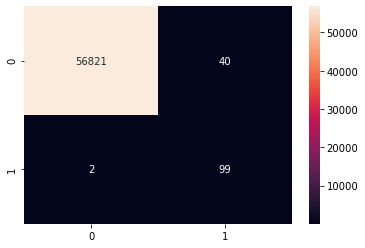

In [75]:
y_pred = clf.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt='.0f')

#### (I) Test data is oversampled + Logistic Regression Binary Classification

              precision    recall  f1-score        support
0              0.948250  0.983957  0.965774   56724.000000
1              0.983414  0.946563  0.964637   57002.000000
accuracy       0.965215  0.965215  0.965215       0.965215
macro avg      0.965832  0.965260  0.965205  113726.000000
weighted avg   0.965875  0.965215  0.965204  113726.000000


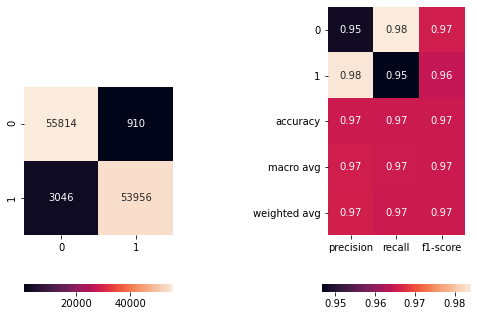

In [76]:
classification_app_inbld(credit_card_data_x_y, logistic_regression_binary_clf, SMOTE, True)

#### (II) Test data is undersampled + Logistic Regression Binary Classification

              precision    recall  f1-score       support
0              0.999804  0.985473  0.992587  56861.000000
1              0.098253  0.891089  0.176991    101.000000
accuracy       0.985306  0.985306  0.985306      0.985306
macro avg      0.549029  0.938281  0.584789  56962.000000
weighted avg   0.998205  0.985306  0.991141  56962.000000


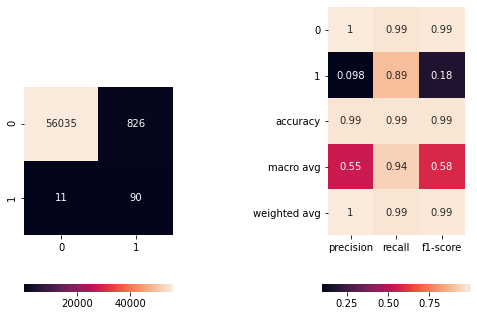

In [77]:
classification_app_inbld(credit_card_data_x_y, logistic_regression_binary_clf, SMOTE, False)

#### (III) Test data is oversampled + Decision Tree Classification

              precision    recall  f1-score        support
0              0.999118  0.998131  0.998624   56724.000000
1              0.998142  0.999123  0.998632   57002.000000
accuracy       0.998628  0.998628  0.998628       0.998628
macro avg      0.998630  0.998627  0.998628  113726.000000
weighted avg   0.998629  0.998628  0.998628  113726.000000


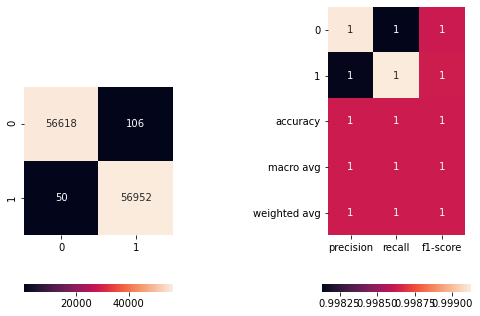

In [78]:
classification_app_inbld(credit_card_data_x_y, decision_tree_model, SMOTE, True)

#### (IV) Test data is undersampled + Decision Tree Classification

              precision    recall  f1-score       support
0              0.999630  0.998241  0.998935  56861.000000
1              0.444444  0.792079  0.569395    101.000000
accuracy       0.997876  0.997876  0.997876      0.997876
macro avg      0.722037  0.895160  0.784165  56962.000000
weighted avg   0.998646  0.997876  0.998174  56962.000000


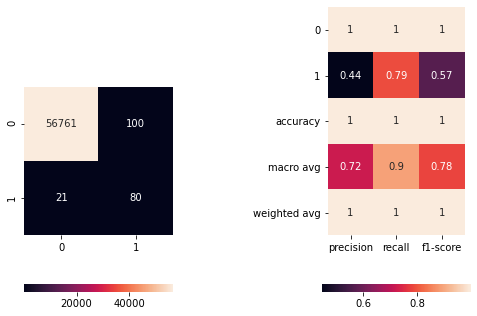

In [79]:
classification_app_inbld(credit_card_data_x_y, decision_tree_model, SMOTE, False)

#### (V) Test data is undersampled + K-Nearest-Neighbour Classifier

              precision    recall  f1-score       support
0              0.999125  0.943336  0.970429  56861.000000
1              0.016484  0.534653  0.031981    101.000000
accuracy       0.942611  0.942611  0.942611      0.942611
macro avg      0.507804  0.738994  0.501205  56962.000000
weighted avg   0.997382  0.942611  0.968765  56962.000000


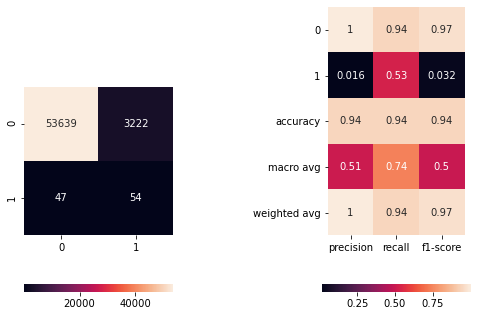

In [80]:
classification_app_inbld(credit_card_data_x_y, knn_clf, SMOTE, False)

#### (VI) Test data is oversampled + K-Nearest-Neighbour Classifier

              precision    recall  f1-score        support
0              0.977096  0.947606  0.962125   56724.000000
1              0.949382  0.977896  0.963428   57002.000000
accuracy       0.962788  0.962788  0.962788       0.962788
macro avg      0.963239  0.962751  0.962776  113726.000000
weighted avg   0.963205  0.962788  0.962778  113726.000000


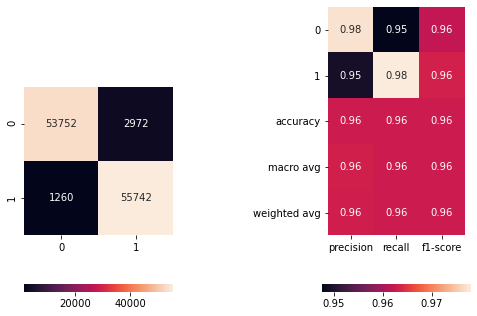

In [81]:
classification_app_inbld(credit_card_data_x_y, knn_clf, SMOTE, True)

#### (VII) Test data is undersampled + Gradient Boosting

              precision    recall  f1-score       support
0              0.999736  0.999771  0.999754  56861.000000
1              0.868687  0.851485  0.860000    101.000000
accuracy       0.999508  0.999508  0.999508      0.999508
macro avg      0.934212  0.925628  0.929877  56962.000000
weighted avg   0.999504  0.999508  0.999506  56962.000000


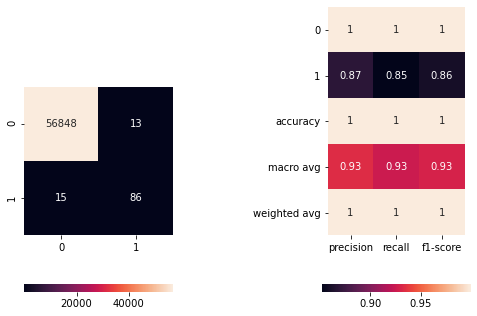

In [82]:
classification_app_inbld(credit_card_data_x_y, GB_clf, SMOTE, False)

#### (VIII) Test data is overdersampled + Gradient Boosting

              precision    recall  f1-score        support
0              0.999982  0.999824  0.999903   56724.000000
1              0.999825  0.999982  0.999904   57002.000000
accuracy       0.999903  0.999903  0.999903       0.999903
macro avg      0.999903  0.999903  0.999903  113726.000000
weighted avg   0.999903  0.999903  0.999903  113726.000000


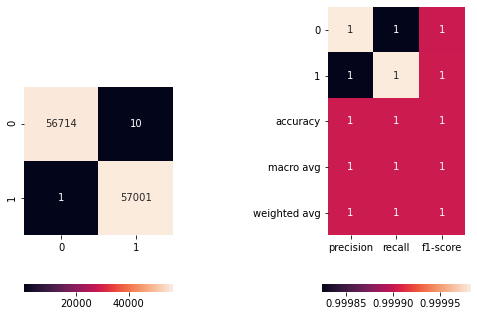

In [84]:
classification_app_inbld(credit_card_data_x_y, GB_clf, SMOTE, True)

#### (IX) Test data is overdersampled + ExtraTree

              precision    recall  f1-score        support
0              1.000000  0.999806  0.999903   56724.000000
1              0.999807  1.000000  0.999904   57002.000000
accuracy       0.999903  0.999903  0.999903       0.999903
macro avg      0.999904  0.999903  0.999903  113726.000000
weighted avg   0.999903  0.999903  0.999903  113726.000000


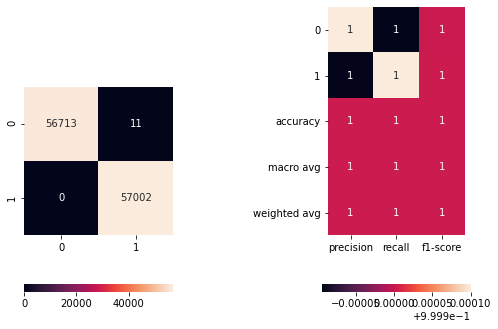

In [85]:
classification_app_inbld(credit_card_data_x_y, ET_clf, SMOTE, True)

#### (X) Test data is undersampled + ExtraTree

              precision    recall  f1-score       support
0              0.999754  0.999789  0.999771  56861.000000
1              0.878788  0.861386  0.870000    101.000000
accuracy       0.999544  0.999544  0.999544      0.999544
macro avg      0.939271  0.930588  0.934886  56962.000000
weighted avg   0.999539  0.999544  0.999541  56962.000000


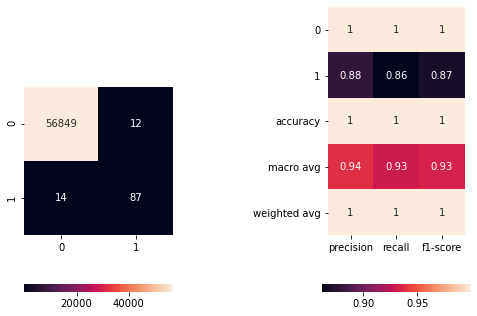

In [86]:
classification_app_inbld(credit_card_data_x_y, ET_clf, SMOTE, False)

### (b) ADASYN - Adaptive Synthetic

https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn

In [87]:
X_adasyn, y_adasyn = ADASYN().fit_resample(X, y)

0    284315
1    284298
Name: Class, dtype: int64


<AxesSubplot:>

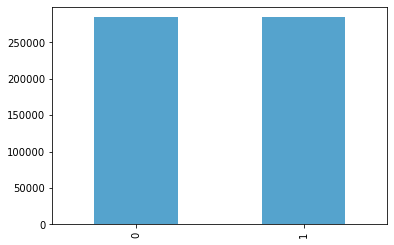

In [88]:
X_adasyn = pd.DataFrame(X_adasyn)
y_adasyn = pd.DataFrame(y_adasyn)
y_class = y_adasyn.iloc[:, 0].value_counts()
print(y_class)
y_class.plot(kind="bar")

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=0)

In [90]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [91]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

<AxesSubplot:>

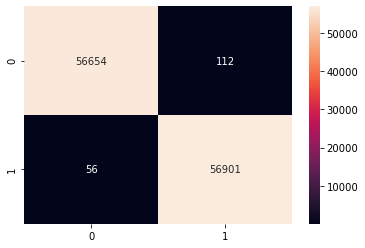

In [92]:
y_pred = clf.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt='.0f')

#### (I) Test data is oversampled + Logistic Regression Binary Classification

              precision    recall  f1-score        support
0              0.954834  0.980939  0.967711   56766.000000
1              0.980471  0.953755  0.966928   56957.000000
accuracy       0.967324  0.967324  0.967324       0.967324
macro avg      0.967652  0.967347  0.967319  113723.000000
weighted avg   0.967674  0.967324  0.967319  113723.000000


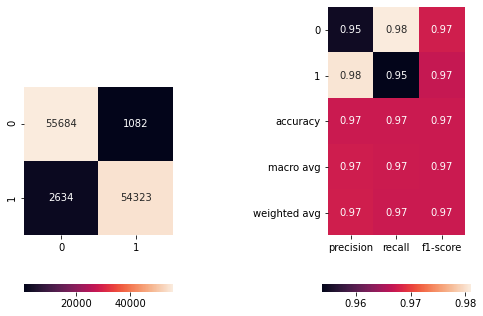

In [93]:
classification_app_inbld(credit_card_data_x_y, logistic_regression_binary_clf, ADASYN, True)

#### (II) Test data is undersampled + Logistic Regression Binary Classification

              precision    recall  f1-score       support
0              0.999821  0.982818  0.991247  56861.000000
1              0.085206  0.900990  0.155689    101.000000
accuracy       0.982673  0.982673  0.982673      0.982673
macro avg      0.542514  0.941904  0.573468  56962.000000
weighted avg   0.998199  0.982673  0.989765  56962.000000


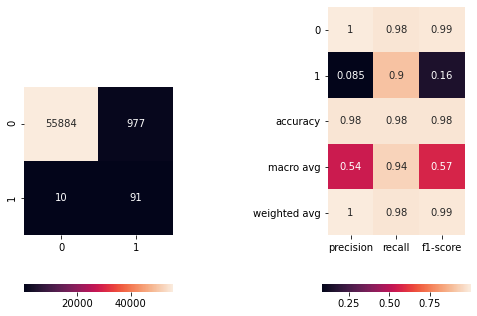

In [94]:
classification_app_inbld(credit_card_data_x_y, logistic_regression_binary_clf, ADASYN, False)

#### (III) Test data is oversampled + Decision Tree Classification

              precision    recall  f1-score        support
0              0.999136  0.998168  0.998652   56766.000000
1              0.998176  0.999140  0.998658   56957.000000
accuracy       0.998655  0.998655  0.998655       0.998655
macro avg      0.998656  0.998654  0.998655  113723.000000
weighted avg   0.998655  0.998655  0.998655  113723.000000


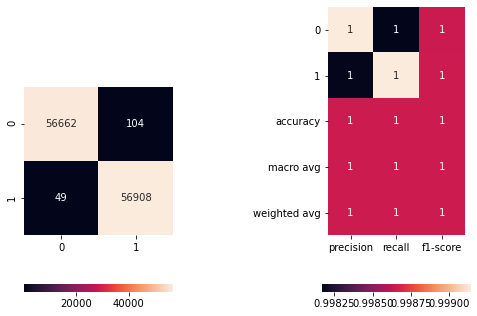

In [95]:
classification_app_inbld(credit_card_data_x_y, decision_tree_model, ADASYN, True)

#### (IV) Test data is undersampled + Decision Tree Classification

              precision    recall  f1-score       support
0              0.999595  0.998153  0.998874  56861.000000
1              0.426230  0.772277  0.549296    101.000000
accuracy       0.997753  0.997753  0.997753      0.997753
macro avg      0.712912  0.885215  0.774085  56962.000000
weighted avg   0.998578  0.997753  0.998076  56962.000000


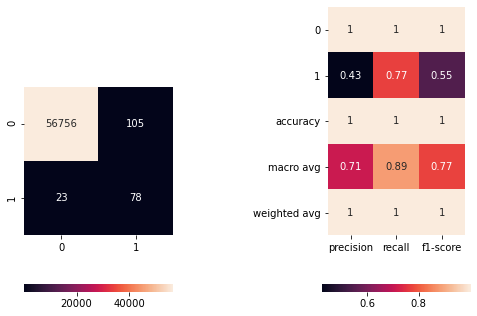

In [96]:
classification_app_inbld(credit_card_data_x_y, decision_tree_model, ADASYN, False)

#### (V) Test data is undersampled + K-Nearest-Neighbour Classifier

              precision    recall  f1-score       support
0              0.999104  0.940979  0.969171  56861.000000
1              0.015547  0.524752  0.030199    101.000000
accuracy       0.940241  0.940241  0.940241      0.940241
macro avg      0.507325  0.732866  0.499685  56962.000000
weighted avg   0.997360  0.940241  0.967506  56962.000000


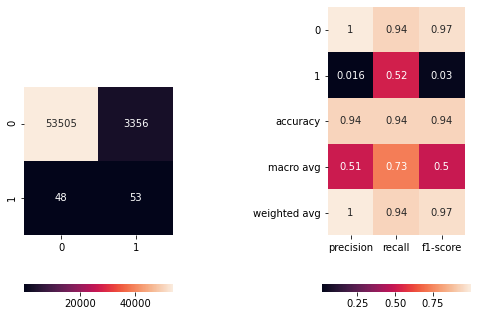

In [97]:
classification_app_inbld(credit_card_data_x_y, knn_clf, ADASYN, False)

#### (VI) Test data is oversampled + Gradient Boosting

              precision    recall  f1-score        support
0              1.000000  0.999841  0.999921   56766.000000
1              0.999842  1.000000  0.999921   56957.000000
accuracy       0.999921  0.999921  0.999921       0.999921
macro avg      0.999921  0.999921  0.999921  113723.000000
weighted avg   0.999921  0.999921  0.999921  113723.000000


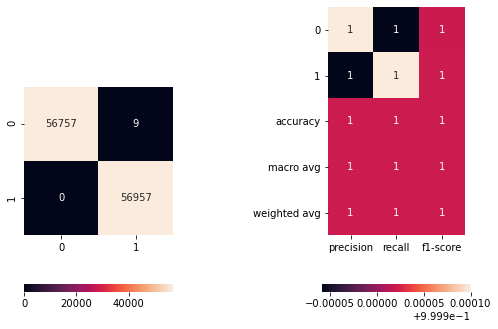

In [98]:
classification_app_inbld(credit_card_data_x_y, GB_clf, ADASYN, True)

#### (VII) Test data is oversampled + ExtraTree

              precision    recall  f1-score        support
0              1.000000  0.999824  0.999912   56766.000000
1              0.999824  1.000000  0.999912   56957.000000
accuracy       0.999912  0.999912  0.999912       0.999912
macro avg      0.999912  0.999912  0.999912  113723.000000
weighted avg   0.999912  0.999912  0.999912  113723.000000


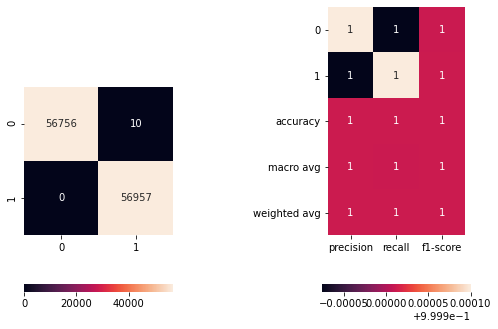

In [99]:
classification_app_inbld(credit_card_data_x_y, ET_clf, ADASYN, True)

#### (VIII) Test data is undersampled + ExtraTree

              precision    recall  f1-score       support
0              0.999771  0.999771  0.999771  56861.000000
1              0.871287  0.871287  0.871287    101.000000
accuracy       0.999544  0.999544  0.999544      0.999544
macro avg      0.935529  0.935529  0.935529  56962.000000
weighted avg   0.999544  0.999544  0.999544  56962.000000


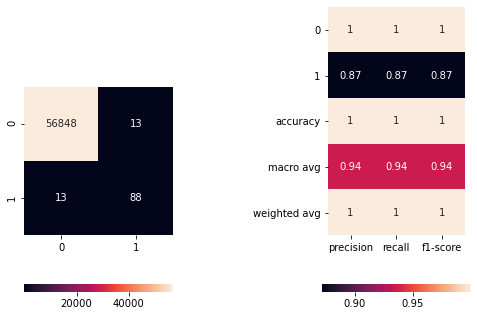

In [100]:
classification_app_inbld(credit_card_data_x_y, ET_clf, ADASYN, False)

#### (IX) Test data is oversampled + K-Nearest-Neighbour Classifier

              precision    recall  f1-score        support
0              0.979202  0.944703  0.961643   56766.000000
1              0.946758  0.980002  0.963093   56957.000000
accuracy       0.962382  0.962382  0.962382       0.962382
macro avg      0.962980  0.962353  0.962368  113723.000000
weighted avg   0.962953  0.962382  0.962370  113723.000000


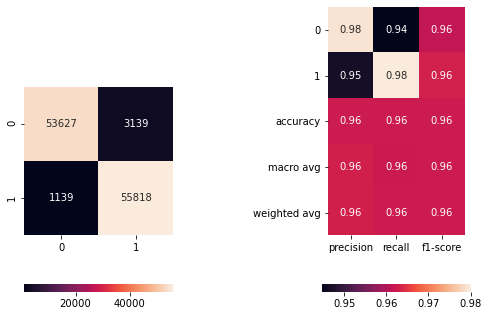

In [101]:
classification_app_inbld(credit_card_data_x_y, knn_clf, ADASYN, True)

### (c) Balanced Random Forest Classifier

              precision    recall  f1-score       support
0              0.999856  0.977454  0.988528  56861.000000
1              0.067636  0.920792  0.126016    101.000000
accuracy       0.977353  0.977353  0.977353      0.977353
macro avg      0.533746  0.949123  0.557272  56962.000000
weighted avg   0.998203  0.977353  0.986999  56962.000000


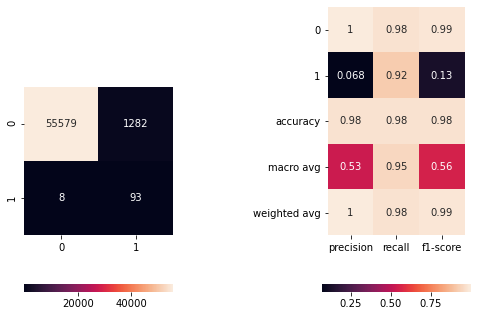

In [102]:
classification_app(credit_card_data_x_y, balanced_random_forest_clf)

# 6. Handling Imbalance Data (#3)

In [103]:
DATAFILE = 'creditcard.csv'
df = pd.read_csv(DATAFILE)

In [104]:
X = df.drop('Class', axis=1)
y = df['Class']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

In [106]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [107]:
# Get test feature matrix and class target
X_test = df.iloc[:, :-1]
y_test = df.iloc[:, -1]

class_0 = train_df[train_df["Class"] == 0]
class_1 = train_df[train_df["Class"] == 1]
#Attempt to balance the trained dataset
# Get class 0 and class 1
#class_0 = df[df["Class"] == 0]
#class_1 = df[df["Class"] == 1]

# Randomly under sample the majority class
class_0_under = class_0.sample(len(class_1))

# Join class_0 and class_1
balanced_data = pd.concat([class_0_under, class_1], axis = 0)

# Shuffle dataset
balanced_data = balanced_data.sample(frac = 1)

# Get train feature matrix and class target
X_train = balanced_data.iloc[:,:-1]
y_train = balanced_data.iloc[:, -1]

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


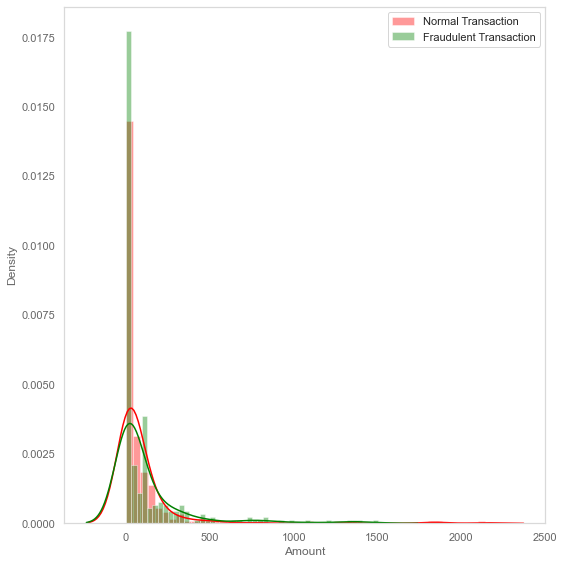

In [108]:
#Visualise dataset: Distribution of Amount
# Get fraud and normal transaction amount
normal_amount = balanced_data.loc[balanced_data["Class"] == 0]["Amount"]
fraud_amount  = balanced_data.loc[balanced_data["Class"] == 1]["Amount"]

# Set font scale
sns.set(font_scale = 1)

# Set graph style
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4', 'axes.grid': False})


# Set the figure size
f, ax = plt.subplots(figsize=(8, 8))

# Make histograms
sns.distplot(normal_amount, color = "red", label = "Normal Transaction");
sns.distplot(fraud_amount, color = "green", label = "Fraudulent Transaction");

# Show legend
plt.legend()

# Tight layout
f.tight_layout()


In [109]:
# Get fraud transaction amount
fraud_amount  = balanced_data.loc[balanced_data["Class"] == 1]["Amount"]

# Average amount per fraud
avg_fraud_amount = round(np.mean(fraud_amount),0)

# Print message
print(f"In average, each fraudulent transaction cost the bank {avg_fraud_amount}.")

In average, each fraudulent transaction cost the bank 122.0.


## (i) Using Selected Classifiers to Determine which is better 

In [110]:
# Create list of tuples with classifier label and classifier object
classifiers = {}

classifiers.update({"Extra Trees Ensemble": ExtraTreesClassifier()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"Ridge Classifier": RidgeClassifier()})
classifiers.update({"Gaussian Naive Bayes": GaussianNB()})
classifiers.update({"K-Nearest Neighbors": KNeighborsClassifier()})
classifiers.update({"Support Vector Classifier": SVC()})
classifiers.update({"Decision Tree": DecisionTreeClassifier()})

# Create dict of decision function labels
DECISION_FUNCTIONS = {"Ridge Classifier", "Support Vector Classifier"}

In [111]:
# Define the Hyper-Parameters
# Initiate parameter grid
parameters = {}



# Update dict with Extra Trees
parameters.update({"Extra Trees Ensemble": { 
                                            "classifier__n_estimators": [200],
                                            "classifier__class_weight": [None, "balanced"],
                                            "classifier__max_features": ["auto", "sqrt", "log2"],
                                            "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                            "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                            "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                            "classifier__criterion" :["gini", "entropy"]     ,
                                            "classifier__n_jobs": [-1]
                                             }})


# Update dict with Random Forest Parameters
parameters.update({"Random Forest": { 
                                    "classifier__n_estimators": [200],
                                    "classifier__class_weight": [None, "balanced"],
                                    "classifier__max_features": ["auto", "sqrt", "log2"],
                                    "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                    "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                    "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                    "classifier__criterion" :["gini", "entropy"]     ,
                                    "classifier__n_jobs": [-1]
                                     }})

# Update dict with Ridge
parameters.update({"Ridge Classifier": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                             }})


# Update dict with GaussianNB Classifier
parameters.update({"Gaussian Naive Bayes": { 
                            "classifier__var_smoothing": [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
                             }})

# Update dict with K Nearest Neighbors Classifier
parameters.update({"K-Nearest Neighbors": { 
                            "classifier__n_neighbors": list(range(1,31)),
                            "classifier__p": [1, 2, 3, 4, 5],
                            "classifier__leaf_size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                            "classifier__n_jobs": [-1]
                             }})


parameters.update({"Support Vector Classifier": { 
                            "classifier__kernel": ["linear", "rbf", "poly"],
                            "classifier__gamma": ["auto"],
                            "classifier__C": [0.1, 0.5, 1, 5, 10, 50, 100],
                            "classifier__degree": [1, 2, 3, 4, 5, 6]
                             }})


# Update dict with Decision Tree Classifier
parameters.update({"Decision Tree": { 
                            "classifier__criterion" :["gini", "entropy"],
                            "classifier__splitter": ["best", "random"],
                            "classifier__class_weight": [None, "balanced"],
                            "classifier__max_features": ["auto", "sqrt", "log2"],
                            "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                             }})

In [112]:
#Tuning of Classifier and Evaluation 
# Initialize dictionary to store results
results = {}

# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    # Print message to user
    print(f"Now tuning {classifier_label}.")
    
    # Scale features via Z-score normalization
    scaler = StandardScaler()
    
    # Define steps in pipeline
    steps = [("scaler", scaler), ("classifier", classifier)]
    
    # Initialize Pipeline object
    pipeline = Pipeline(steps = steps)
      
    # Define parameter grid
    param_grid = parameters[classifier_label]
    
    # Initialize GridSearch object
    gscv = GridSearchCV(pipeline, param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = "recall")
                      
    # Fit gscv
    gscv.fit(X_train, np.ravel(y_train))  
    
    # Get best parameters and score
    best_params = gscv.best_params_
    best_score = gscv.best_score_
    
    # Update classifier parameters and define new pipeline with tuned classifier
    tuned_params = {item[12:]: best_params[item] for item in best_params}
    classifier.set_params(**tuned_params)
            
    # Make predictions
    if classifier_label in DECISION_FUNCTIONS:
        y_pred = gscv.decision_function(X_test)
    else:
        y_pred = gscv.predict_proba(X_test)[:,1]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # Get f1 score
    y_pred = gscv.predict(X_test)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # Get recall score
    recall = metrics.recall_score(y_test, y_pred)

    # Get precision score
    precision = metrics.precision_score(y_test, y_pred)
    
    # False Positive rate
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fp_rate = (fp)/(fp + tn)

    # Save results
    result = {"Classifier": gscv,
              "Best Parameters": best_params,
              "Training Recall Score": best_score,
              "Test Recall Score": recall,
              "Test Precision Score": precision,
              "Test F1 Score": f1,
              "False Positive Rate": fp_rate,
              "Test AUC": auc}
    
    results.update({classifier_label: result})

Now tuning Extra Trees Ensemble.
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Now tuning Random Forest.
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Now tuning Ridge Classifier.
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Now tuning Gaussian Naive Bayes.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Now tuning K-Nearest Neighbors.
Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
Now tuning Support Vector Classifier.
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Now tuning Decision Tree.
Fitting 5 folds for each of 3072 candidates, totalling 15360 fits


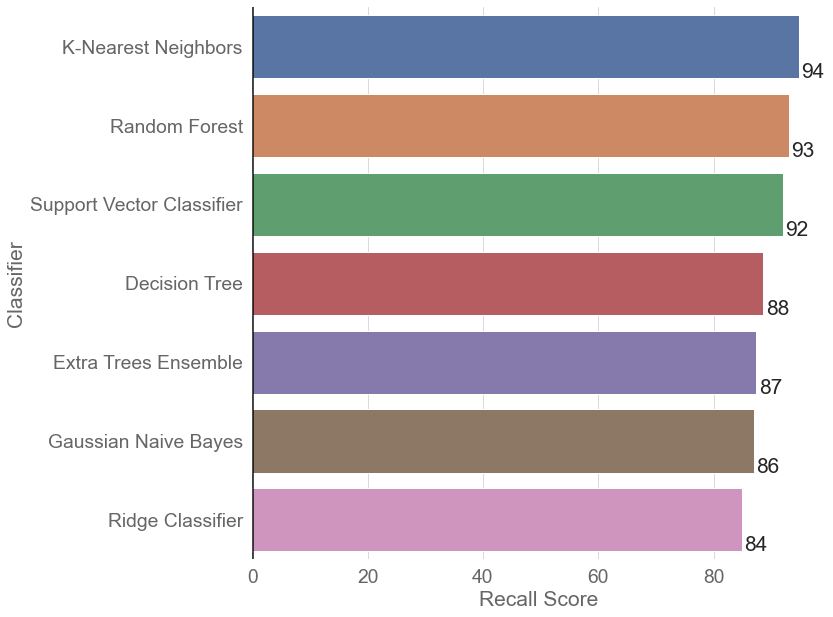

In [113]:
#Visualise the results in Bar Plot -- using the Recall Score
# Helper function to show values on bar
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# Recall scores plot
recall_scores = {
              "Classifier": [],
              "Recall Score": [],
              }

# Get recall scores into dictionary
for classifier_label in results:  
    recall_scores.update({"Classifier": [classifier_label] + recall_scores["Classifier"],
                       "Recall Score": [results[classifier_label]["Test Recall Score"]] + recall_scores["Recall Score"]
                       })

# Dictionary to PandasDataFrame
recall_scores = pd.DataFrame(recall_scores)

# Sort dataframe
recall_scores = recall_scores.sort_values(by = ["Recall Score"], ascending = False)

# Convert decimals to percentages
recall_scores[recall_scores.select_dtypes(include=['number']).columns] *= 100

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Colors
palette = sns.color_palette("YlOrRd", 20)[::-1]

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

g = sns.barplot(x="Recall Score", y="Classifier", 
            data = recall_scores)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Show values
show_values_on_bars(g, h_v="h", space=0.4)

# Tight layout
plt.tight_layout()

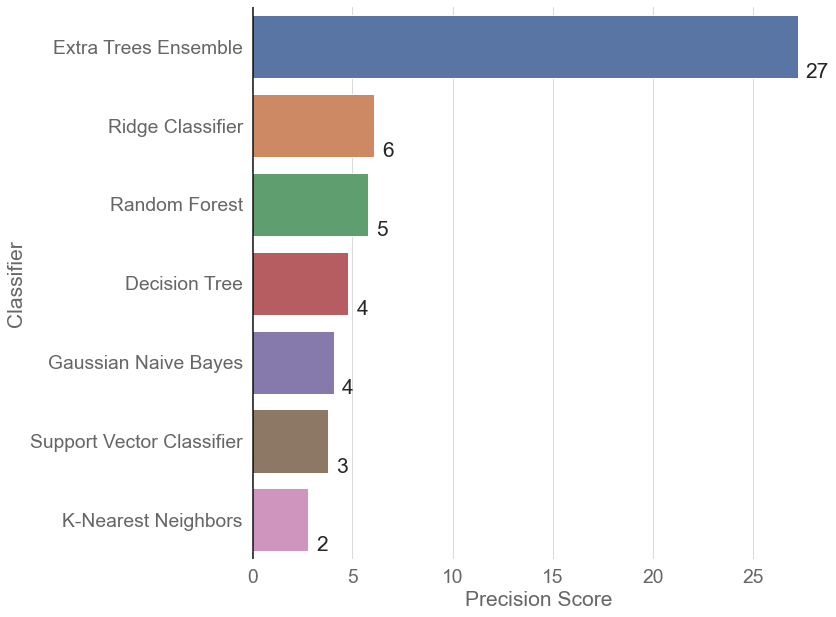

In [114]:
#Visualise the results in Bar Plot -- using the Precision Score
# Helper function to show values on bar
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# Precision scores plot
precision_scores = {
              "Classifier": [],
              "Precision Score": [],
              }

# Get precision scores into dictionary
for classifier_label in results:  
    precision_scores.update({"Classifier": [classifier_label] + precision_scores["Classifier"],
                       "Precision Score": [results[classifier_label]["Test Precision Score"]] + precision_scores["Precision Score"]
                       })

# Dictionary to PandasDataFrame
precision_scores = pd.DataFrame(precision_scores)

# Sort dataframe
precision_scores = precision_scores.sort_values(by = ["Precision Score"], ascending = False)

# Convert decimals to percentages
precision_scores[precision_scores.select_dtypes(include=['number']).columns] *= 100

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Colors
palette = sns.color_palette("YlOrRd", 20)[::-1]

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

g = sns.barplot(x="Precision Score", y="Classifier",
            data = precision_scores)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Show values
show_values_on_bars(g, h_v="h", space=0.4)

# Tight layout
plt.tight_layout()

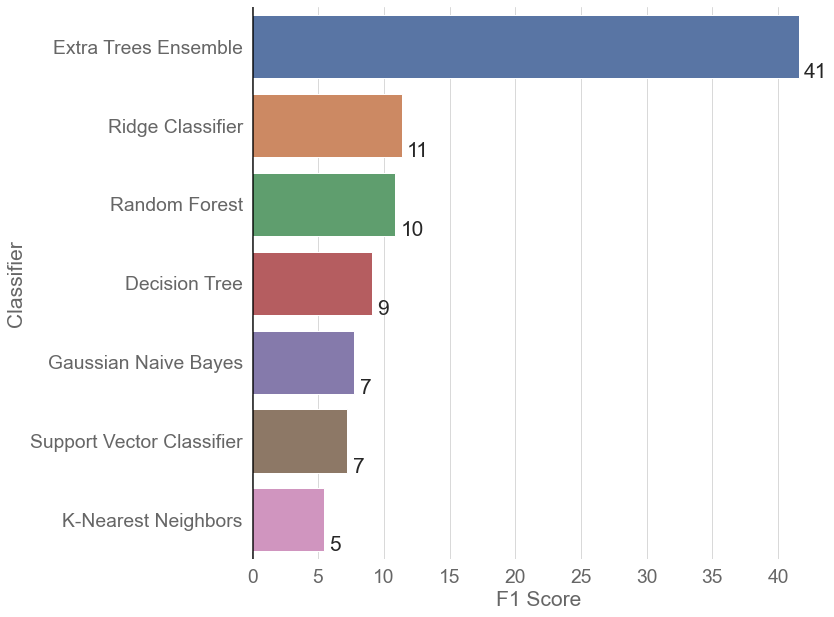

In [115]:
#Visualise the results in Bar Plot -- using the Precision Score
# Helper function to show values on bar
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# F1 scores plot
f1_scores = {
              "Classifier": [],
              "F1 Score": [],
              }

# Get precision scores into dictionary
for classifier_label in results:  
    f1_scores.update({"Classifier": [classifier_label] + f1_scores["Classifier"],
                       "F1 Score": [results[classifier_label]["Test F1 Score"]] + f1_scores["F1 Score"]
                       })

# Dictionary to PandasDataFrame
f1_scores = pd.DataFrame(f1_scores)

# Sort dataframe
f1_scores = f1_scores.sort_values(by = ["F1 Score"], ascending = False)

# Convert decimals to percentages
f1_scores[f1_scores.select_dtypes(include=['number']).columns] *= 100

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Colors
palette = sns.color_palette("YlOrRd", 20)[::-1]

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

g = sns.barplot(x="F1 Score", y="Classifier",
            data = f1_scores)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Show values
show_values_on_bars(g, h_v="h", space=0.4)

# Tight layout
plt.tight_layout()

## (ii) Assuming Costs per Classifier

Assuming that 1 person in a day can handle at least 5 transactions 
from: https://www.totaljobs.com/jobs/fraud-analyst/in-europe

Typical Fraud Analyst in Europe earns an average of EUR 33k p.a. = EUR 138 / day (assuming 20 working days in a month). 
Adding on other misc costs, total operating costs approx EUR 200/ day for 1 person = EUR 40 per transaction

In [116]:
# Cost of 1 missing fraudulent transaction = 122 + operating costs
missed_fraudcost = 122+40

# Cost of labeling normal transaction as fraudulent = operating costs
incorrect_fraudcost = 40

In [117]:
#Determine the best Classifier 

#Get recall scores into dictionary
for classifier_label in results:
    # Classifier
    classifier = results[classifier_label]["Classifier"]
    
    # Make predictions
    y_pred = classifier.predict(X_test)

    # Get confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Get the difference
    difference = np.abs((missed_fraudcost*fn + incorrect_fraudcost*fp))
    
    # Message to user
    print(f"{classifier_label} costs EUR{difference}.")

Extra Trees Ensemble costs EUR55964.
Random Forest costs EUR304708.
Ridge Classifier costs EUR269908.
Gaussian Naive Bayes costs EUR415248.
K-Nearest Neighbors costs EUR654092.
Support Vector Classifier costs EUR469758.
Decision Tree costs EUR355392.
